# 1️⃣ Project Overview & Objectives
- Project Goal: Analyze customer data from a telecommunications company to uncover patterns related to customer churn.

- Business Objective: Identify drivers of churn to inform marketing strategies that reduce customer attrition.

- Dataset: telco.csv with customer demographics, services subscribed, and churn labels.

# 2️⃣ Setup & Libraries

In [37]:
# Basic
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# Hyperparameter Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Config
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

# 3️⃣ Data Loading

In [2]:
# Load dataset
telco_raw = pd.read_csv(r"C:\Users\USER\Documents\my_DS_projects\SUPERVISED\CLASSIFICATION\ML for Marketing\telco.csv")

# Quick check
telco_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 4️⃣ Data Understanding

In [3]:
# Dataset shape
print(f"Shape: {telco_raw.shape}")

# Column types & non-null info
telco_raw.info()

# Descriptive stats (numerical features)
telco_raw.describe()

# Descriptive stats (categorical features)
telco_raw.describe(include='object')

Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Based on the output above the following was observed
- The dataset has 7,043 rows and 21 columns, with many categorical features and some numerical ones.
- `TotalCharges` is stored as an object, indicating potential data quality issues.
- No missing values in most columns, but we need to confirm after converting `TotalCharges`.
**Action Plan**:  
- Convert `TotalCharges` to numeric and handle any missing values.
- Encode categorical columns for modeling.
- Drop unnecessary columns like `customerID`.

# 5️⃣ Data Cleaning
Key Tasks:
- ✅ Check for missing values
- ✅ Convert TotalCharges from object to numeric
- ✅ Identify and handle inconsistent values
- ✅ Checkign duplicates values
- ✅ Checking outliers
- ✅ Checking Cardinality

In [4]:
# Missing values
telco_raw.isnull().sum()

# Convert 'TotalCharges' to numeric (coerce errors → NaN)
telco_raw['TotalCharges'] = pd.to_numeric(telco_raw['TotalCharges'], errors='coerce')

# Recheck missing
telco_raw.isnull().sum()

# Remove rows with missing TotalCharges (or fill)
telco_raw.dropna(subset=['TotalCharges'], inplace=True)

# Confirm cleaning
telco_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


We noticed that after cleaning the number of rows reduced from 7043 to 7032, that means about 11 rows were dropped as a result of the `TotalCharges` column.
Now after cleaning we have a total of 4 numeric features and 17 objects features

## Checking duplicates values

In [5]:
# Check for duplicate rows based on all columns
duplicate_rows = telco_raw.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")

Total duplicate rows: 0


Even though each customer should have a unique customerID, it’s wise to confirm

## Checking for outliers

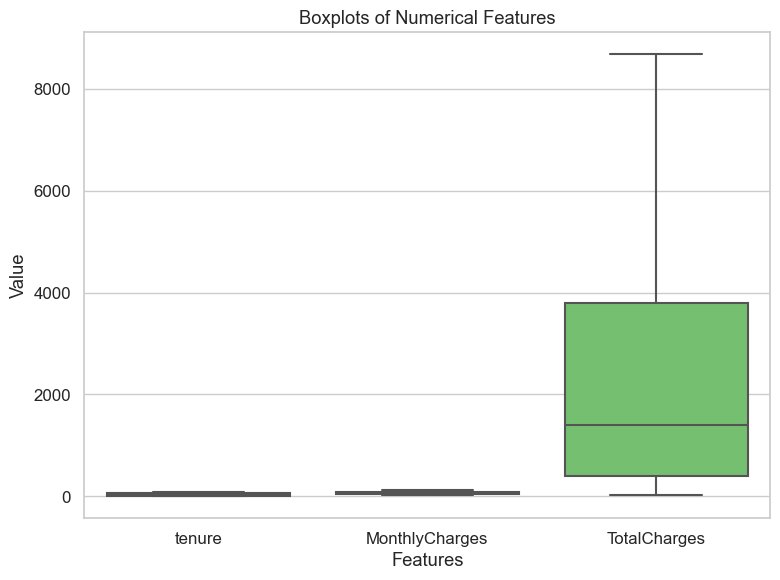

In [6]:
# Numerical columns you want to compare
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Melt the dataframe to long format
telco_melted = telco_raw[num_cols].melt(var_name='Feature', value_name='Value')

# Create a single boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=telco_melted, x='Feature', y='Value')
plt.title('Boxplots of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


We see that there isn't an issue of outlier but we need to adjust the scales before we go ahead with modeling.

## Checking high cardinality

In [7]:
# Select object columns
cat_cols = telco_raw.select_dtypes(include='object').columns

# Check unique values
for col in cat_cols:
    print(f"{col}: {telco_raw[col].nunique()} unique values")

customerID: 7032 unique values
gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values
Churn: 2 unique values


We do not have problematic high-cardinality categorical features, except `customerID` which we will need to drop now.

In [8]:
telco_raw.drop('customerID', axis=1, inplace=True)
telco_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


# 6️⃣ Exploratory Data Analysis (EDA)
## 6.1 Target Variable (Churn)

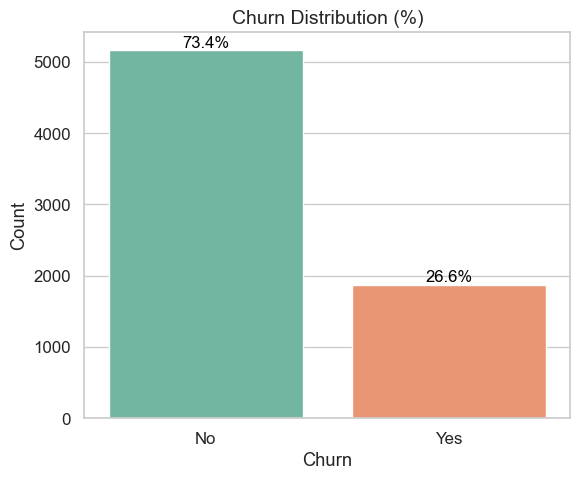

In [ ]:
# Distribution of Churn
plt.figure(figsize=(6,5))
ax = sns.countplot(data=telco_raw, x='Churn', palette='Set2')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100*height/len(telco_raw):.1f}%', (p.get_x()+p.get_width()/2., height), 
                ha='center', va='bottom', fontsize=12, color='black')
plt.title('Churn Distribution (%)', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

We noticed from the visuals above that there are more customers that did not churn.

In [ ]:
telco_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## 6.2 Monthly Charges vs. Churn (Boxplot)

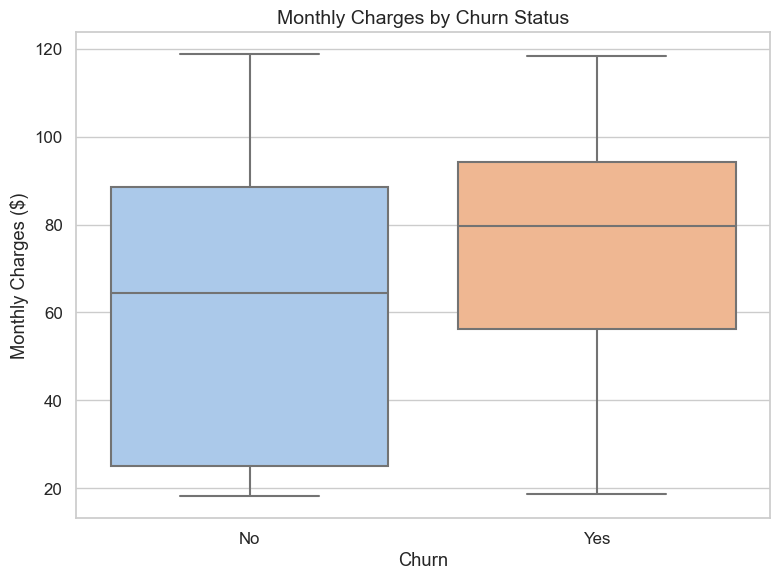

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=telco_raw, x='Churn', y='MonthlyCharges', palette='pastel')
plt.title('Monthly Charges by Churn Status', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.tight_layout()
plt.show()

## 6.3 Contract Type vs. Churn (Stacked Bar)

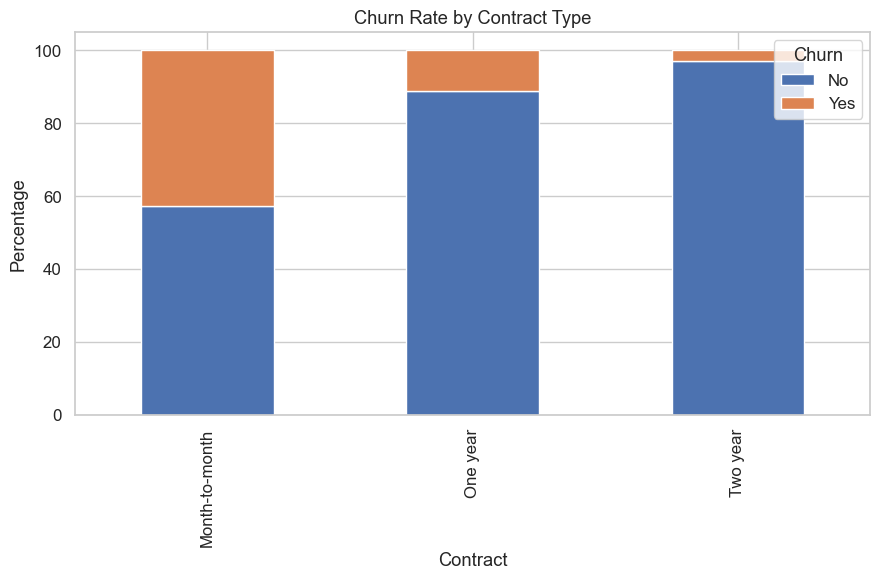

In [ ]:
contract_churn = telco_raw.groupby(['Contract', 'Churn']).size().unstack().fillna(0)
contract_churn_pct = contract_churn.div(contract_churn.sum(axis=1), axis=0) * 100

contract_churn_pct.plot(kind='bar', stacked=True, figsize=(9,6), 
                        color=['#4C72B0', '#DD8452'])
plt.title('Churn Rate by Contract Type')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

## 6.4 Numerical Features vs Churn

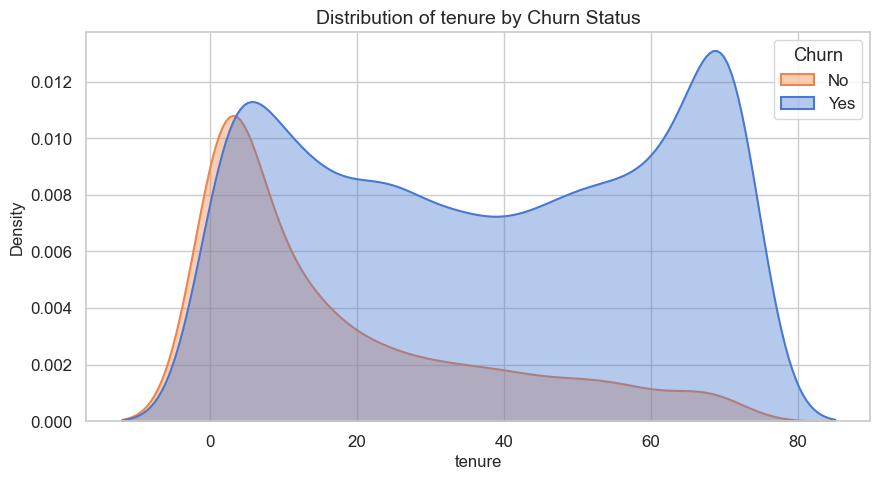

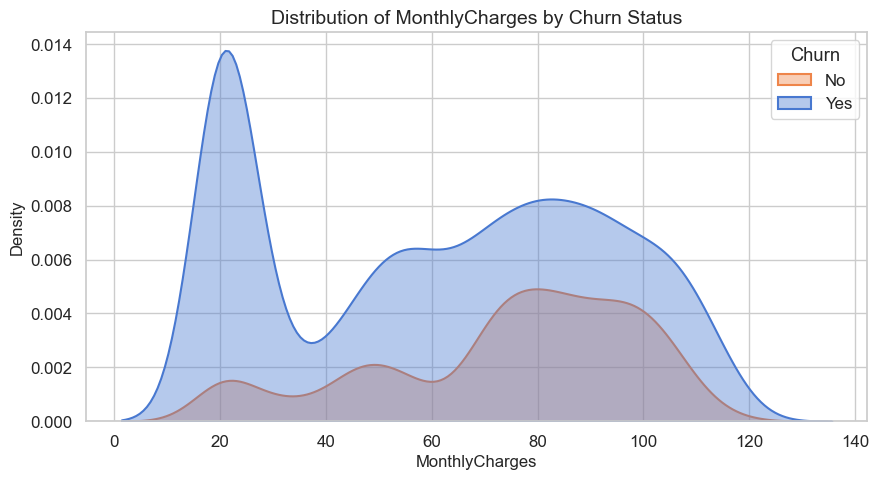

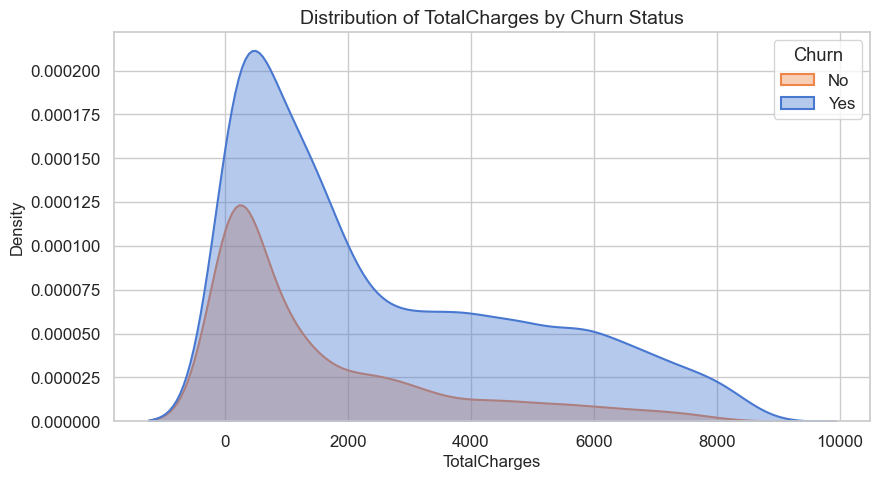

In [ ]:
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_features:
    plt.figure(figsize=(9, 5))
    ax = sns.kdeplot(
        data=telco_raw, x=col, hue='Churn', fill=True, alpha=0.4, linewidth=1.5
    )
    ax.set_title(f"Distribution of {col} by Churn Status", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Density", fontsize=12)
    plt.legend(title='Churn', labels=['No', 'Yes'])
    plt.tight_layout()
    plt.savefig(f"{col}_distribution.png", dpi=300)  # Save for LaTeX inclusion
    plt.show()

## 6.5 Correlation Heatmap of Numeric Features

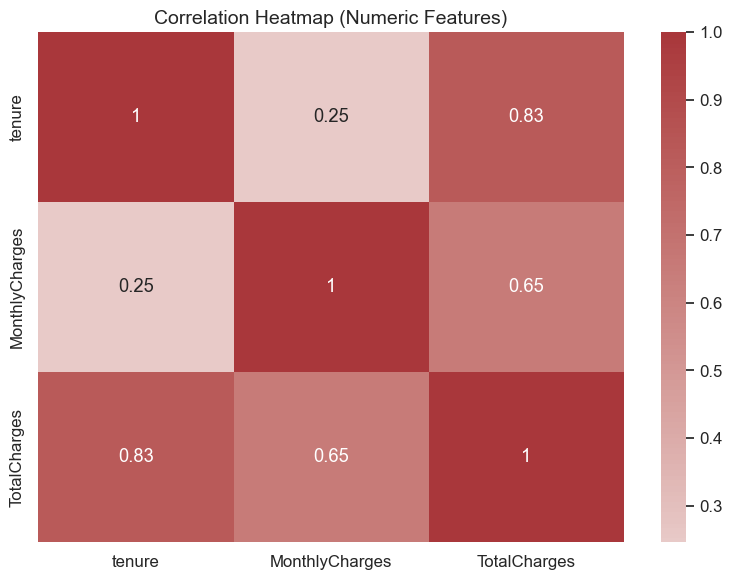

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
plt.figure(figsize=(8,6))
sns.heatmap(telco_raw[num_cols].corr(numeric_only=True), annot=True, cmap='vlag', center=0)
plt.title('Correlation Heatmap (Numeric Features)', fontsize=14)
plt.tight_layout()
plt.show();

# 7️⃣ Feature Engineering & Preprocessing
Steps:
- ✅ Encode categorical variables
- ✅ Scale numerical variables
- ✅ Create training & test sets

In [23]:
# Encode target variable
telco_raw['Churn'] = telco_raw['Churn'].map({'No':0, 'Yes':1})

# Encode binary categorical features
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

le = LabelEncoder()
for col in binary_cols:
    telco_raw[col] = le.fit_transform(telco_raw[col])

# One-hot encode multi-class categorical features
multi_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
              'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaymentMethod']

telco_raw = pd.get_dummies(telco_raw, columns=multi_cols, drop_first=True)

In [26]:
# Split features and target
X = telco_raw.drop('Churn', axis=1)
y = telco_raw['Churn']

# Train-test split (stratified to preserve churn ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale numerical features
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Check shapes to confirm
print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)

Train features shape: (5625, 30)
Test features shape: (1407, 30)


# Modeling

In [30]:
# Function for Evaluation
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else roc_auc_score(y_test, y_pred)
    
    print(f"\n📌 {model_name} Performance:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

In [38]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_train, y_train, model_name="Random Forest (Train)")
evaluate_model(rf_model, X_test, y_test, model_name="Random Forest (Test)")


📌 Random Forest (Train) Performance:
Accuracy: 0.9988
Precision: 0.9987
Recall: 0.9967
F1 Score: 0.9977
ROC AUC: 1.0000

📌 Random Forest (Test) Performance:
Accuracy: 0.7868
Precision: 0.6217
Recall: 0.5053
F1 Score: 0.5575
ROC AUC: 0.8142


In [40]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_train, y_train, model_name="Decision Tree(Train)")
evaluate_model(dt_model, X_test, y_test, model_name="Decision Tree (Test)")


📌 Decision Tree(Train) Performance:
Accuracy: 0.9988
Precision: 0.9993
Recall: 0.9960
F1 Score: 0.9977
ROC AUC: 1.0000

📌 Decision Tree (Test) Performance:
Accuracy: 0.7114
Precision: 0.4568
Recall: 0.4519
F1 Score: 0.4543
ROC AUC: 0.6286


In [41]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
evaluate_model(lr_model, X_train, y_train, model_name="Logistic Regression(Train)")
evaluate_model(lr_model, X_test, y_test, model_name="Logistic Regression(Test)")


📌 Logistic Regression(Train) Performance:
Accuracy: 0.8048
Precision: 0.6592
Recall: 0.5498
F1 Score: 0.5996
ROC AUC: 0.8506

📌 Logistic Regression(Test) Performance:
Accuracy: 0.8045
Precision: 0.6505
Recall: 0.5722
F1 Score: 0.6088
ROC AUC: 0.8361


### Comparing the results

In [44]:
results = []

# === RANDOM FOREST ===
# Train metrics
y_train_pred_rf = rf_model.predict(X_train)
y_train_prob_rf = rf_model.predict_proba(X_train)[:,1]
results.append({
    'Model': 'Random Forest',
    'Set': 'Train',
    'Accuracy': accuracy_score(y_train, y_train_pred_rf),
    'Precision': precision_score(y_train, y_train_pred_rf),
    'Recall': recall_score(y_train, y_train_pred_rf),
    'F1 Score': f1_score(y_train, y_train_pred_rf),
    'ROC AUC': roc_auc_score(y_train, y_train_prob_rf)
})

# Test metrics
y_test_pred_rf = rf_model.predict(X_test)
y_test_prob_rf = rf_model.predict_proba(X_test)[:,1]
results.append({
    'Model': 'Random Forest',
    'Set': 'Test',
    'Accuracy': accuracy_score(y_test, y_test_pred_rf),
    'Precision': precision_score(y_test, y_test_pred_rf),
    'Recall': recall_score(y_test, y_test_pred_rf),
    'F1 Score': f1_score(y_test, y_test_pred_rf),
    'ROC AUC': roc_auc_score(y_test, y_test_prob_rf)
})


# === DECISION TREE ===
# Train metrics
y_train_pred_dt = dt_model.predict(X_train)
y_train_prob_dt = dt_model.predict_proba(X_train)[:,1]
results.append({
    'Model': 'Decision Tree',
    'Set': 'Train',
    'Accuracy': accuracy_score(y_train, y_train_pred_dt),
    'Precision': precision_score(y_train, y_train_pred_dt),
    'Recall': recall_score(y_train, y_train_pred_dt),
    'F1 Score': f1_score(y_train, y_train_pred_dt),
    'ROC AUC': roc_auc_score(y_train, y_train_prob_dt)
})

# Test metrics
y_test_pred_dt = dt_model.predict(X_test)
y_test_prob_dt = dt_model.predict_proba(X_test)[:,1]
results.append({
    'Model': 'Decision Tree',
    'Set': 'Test',
    'Accuracy': accuracy_score(y_test, y_test_pred_dt),
    'Precision': precision_score(y_test, y_test_pred_dt),
    'Recall': recall_score(y_test, y_test_pred_dt),
    'F1 Score': f1_score(y_test, y_test_pred_dt),
    'ROC AUC': roc_auc_score(y_test, y_test_prob_dt)
})


# === LOGISTIC REGRESSION ===
# Train metrics
y_train_pred_lr = lr_model.predict(X_train)
y_train_prob_lr = lr_model.predict_proba(X_train)[:,1]
results.append({
    'Model': 'Logistic Regression',
    'Set': 'Train',
    'Accuracy': accuracy_score(y_train, y_train_pred_lr),
    'Precision': precision_score(y_train, y_train_pred_lr),
    'Recall': recall_score(y_train, y_train_pred_lr),
    'F1 Score': f1_score(y_train, y_train_pred_lr),
    'ROC AUC': roc_auc_score(y_train, y_train_prob_lr)
})

# Test metrics
y_test_pred_lr = lr_model.predict(X_test)
y_test_prob_lr = lr_model.predict_proba(X_test)[:,1]
results.append({
    'Model': 'Logistic Regression',
    'Set': 'Test',
    'Accuracy': accuracy_score(y_test, y_test_pred_lr),
    'Precision': precision_score(y_test, y_test_pred_lr),
    'Recall': recall_score(y_test, y_test_pred_lr),
    'F1 Score': f1_score(y_test, y_test_pred_lr),
    'ROC AUC': roc_auc_score(y_test, y_test_prob_lr)
})


# === Create DataFrame ===
results_df = pd.DataFrame(results).set_index(['Model', 'Set'])
display(results_df)

Accuracy  Precision    Recall  F1 Score   ROC AUC
Model               Set                                                     
Random Forest       Train  0.998756   0.998660  0.996656  0.997657  0.999958
                    Test   0.786780   0.621711  0.505348  0.557522  0.814197
Decision Tree       Train  0.998756   0.999329  0.995987  0.997655  0.999995
                    Test   0.711443   0.456757  0.451872  0.454301  0.628600
Logistic Regression Train  0.804800   0.659182  0.549833  0.599562  0.850569
                    Test   0.804549   0.650456  0.572193  0.608819  0.836071

In [45]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
evaluate_model(grid.best_estimator_, X_test, y_test, model_name="Tuned Logistic Regression")

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

📌 Tuned Logistic Regression Performance:
Accuracy: 0.8010
Precision: 0.6407
Recall: 0.5722
F1 Score: 0.6045
ROC AUC: 0.8354


In [46]:
cv_scores = cross_val_score(grid.best_estimator_, X, y, cv=5, scoring='roc_auc')
print("Cross-validated ROC AUC scores:", cv_scores)
print("Mean ROC AUC: {:.4f}".format(cv_scores.mean()))
print("Standard Deviation: {:.4f}".format(cv_scores.std()))

Cross-validated ROC AUC scores: [0.85706447 0.85592299 0.83443288 0.83612113 0.83796843]
Mean ROC AUC: 0.8443
Standard Deviation: 0.0100


# Result interpretation

,Feature,Coefficient
0,InternetService_Fiber optic,2.073051
1,StreamingTV_Yes,0.754252
2,StreamingMovies_Yes,0.727223
3,TotalCharges,0.698652
4,MultipleLines_Yes,0.555584
5,PaymentMethod_Electronic check,0.383086
6,PaperlessBilling,0.289443
7,DeviceProtection_Yes,0.265422
8,SeniorCitizen,0.193575
9,PaymentMethod_Mailed check,0.076093


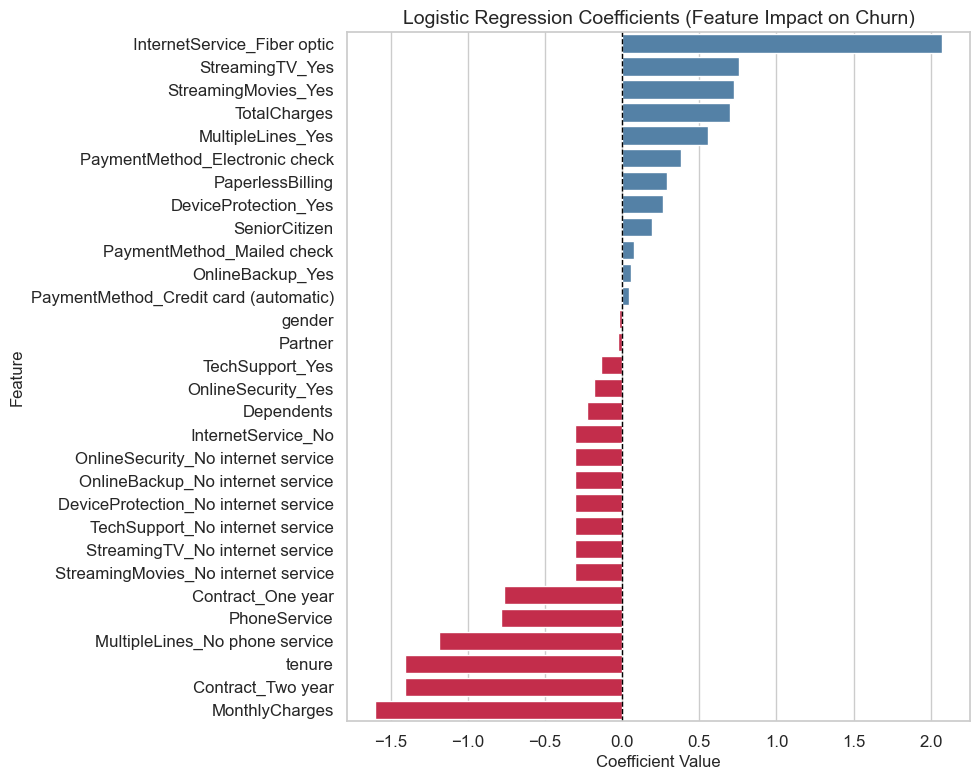

In [54]:
# Create DataFrame as before
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': grid.best_estimator_.coef_[0]
})

# Add absolute value for sorting convenience
coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()

# Sort: first by sign (positive first), then by absolute magnitude descending
coefficients_sorted = coefficients.sort_values(
    by=['Coefficient', 'AbsCoefficient'],
    ascending=[False, False]  # positive first, largest magnitude first
).drop(columns='AbsCoefficient').reset_index(drop=True)

display(coefficients_sorted)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=coefficients_sorted,
    palette=['crimson' if c < 0 else 'steelblue' for c in coefficients_sorted['Coefficient']]
)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.title("Logistic Regression Coefficients (Feature Impact on Churn)", fontsize=14)
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

,Feature,Coefficient,Odds Ratio
0,InternetService_Fiber optic,2.073051,7.949035
1,StreamingTV_Yes,0.754252,2.126021
2,StreamingMovies_Yes,0.727223,2.069327
3,TotalCharges,0.698652,2.011041
4,MultipleLines_Yes,0.555584,1.742959
5,PaymentMethod_Electronic check,0.383086,1.466805
6,PaperlessBilling,0.289443,1.335683
7,DeviceProtection_Yes,0.265422,1.303981
8,SeniorCitizen,0.193575,1.213580
9,PaymentMethod_Mailed check,0.076093,1.079062


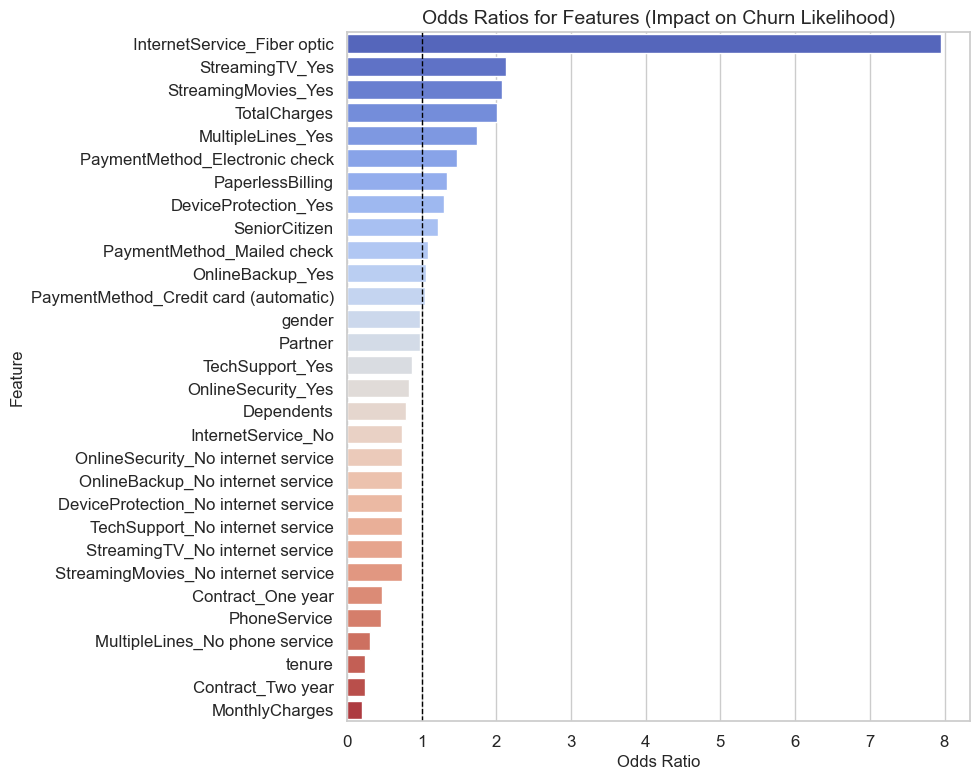

In [ ]:
# Create a DataFrame with features, coefficients, and odds ratios
odds_df = coefficients_sorted[['Feature', 'Coefficient']].copy()
odds_df['Odds Ratio'] = np.exp(odds_df['Coefficient'])

# Reset index for a neat presentation
odds_df.reset_index(drop=True, inplace=True)

display(odds_df)

# Calculate Odds Ratios on your sorted DataFrame
coefficients_sorted['Odds Ratio'] = np.exp(coefficients_sorted['Coefficient'])

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Odds Ratio',
    y='Feature',
    data=coefficients_sorted,
    palette='coolwarm'
)
plt.axvline(1, color='black', linestyle='--', linewidth=1)
plt.title("Odds Ratios for Features (Impact on Churn Likelihood)", fontsize=14)
plt.xlabel("Odds Ratio", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show();

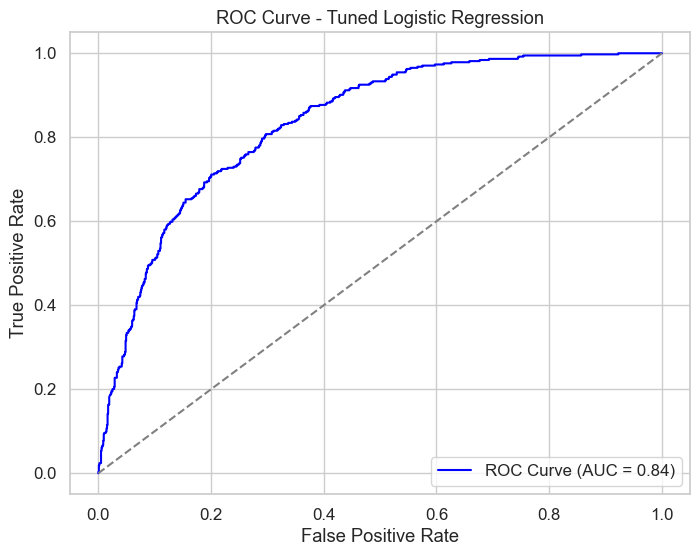

In [ ]:
y_test_prob = grid.best_estimator_.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()